In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn import preprocessing

In [70]:
pd.set_option("display.max_columns",100)
df = pd.read_csv('Coffee-modified.csv')
# df = pd.read_csv('arabica_data_cleaned.csv')

print('原始資料columns數: {}'.format(len(df.columns)))

# df.drop(axis= 1, columns= ['Owner','Farm.Name','Mill','Company','Producer','Certification.Address','Certification.Contact'], inplace= True)


norm_cols = ['Species','Country.of.Origin','Number.of.Bags',"Bag.Weight","Harvest.Year","Variety","Processing.Method"]
flavor_cols = ["Aroma","Flavor","Aftertaste","Acidity","Body","Balance","Uniformity","Clean.Cup","Sweetness","Total.Cup.Points","Moisture","Category.One.Defects","Quakers","Category.Two.Defects","Certification.Body","altitude_low_meters","altitude_high_meters","altitude_mean_meters"]
cols = norm_cols + flavor_cols
# print('column length: {}'.format(len(cols)))

df = df[cols]
# print(df.info())
# print(df.describe())
print('篩選後columns數: {}'.format(len(df.columns)))

原始資料columns數: 44
篩選後columns數: 25


In [3]:
# df.loc[df['altitude_mean_meters']>5000]

In [4]:
# df.loc[df['unit_of_measurement']=='ft']

In [5]:
# df.nunique()

In [6]:
# df.info()

# Preprocessing 

## Drop nan

In [7]:
df.dropna(inplace= True)

In [8]:
# df[df['altitude_mean_meters']>10000]

In [9]:
df.drop(df[df['altitude_mean_meters']>10000].index,inplace=True)

In [10]:
df = df.reset_index(drop= True)

In [11]:
df.head(3)

,Species,Country.of.Origin,Number.of.Bags,Bag.Weight,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,Certification.Body,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Ethiopia,300,60 kg,2014,Other,Washed / Wet,8.75,8.67,8.5,8.58,8.42,8.42,10.0,10.0,10.0,89.92,0.12,0,0,1.0,METAD Agricultural Development plc,1950.0,2200.0,2075.0
1,Arabica,Ethiopia,300,60 kg,2014,Other,Washed / Wet,8.25,8.5,8.25,8.5,8.42,8.33,10.0,10.0,10.0,88.83,0.12,0,0,2.0,METAD Agricultural Development plc,1950.0,2200.0,2075.0
2,Arabica,Ethiopia,50,60 kg,2014,Other,Natural / Dry,8.08,8.58,8.5,8.5,7.67,8.42,10.0,10.0,10.0,88.25,0.1,0,0,4.0,METAD Agricultural Development plc,1795.0,1850.0,1822.5


In [12]:
# df.info()

In [13]:
# df['Aroma'] = df['Aroma'].apply(lambda x: float(x))

In [14]:
# for col in df.select_dtypes(include=['object']).columns:
#     print('--------------------------------------------------')
#     print(col+'\n')
#     print(df[col].value_counts())

## 將數值型data從Obj轉成float

In [15]:
df_obj = df.select_dtypes(include=['object'])
for col in df_obj.columns:
    try:
        df[col] = df[col].apply(lambda x: float(x))
    except:
        pass

In [16]:
# df.info()

In [17]:
df.select_dtypes(include=['float']).describe()

,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,156.462733,7.564710,7.508623,7.380890,7.519700,7.500145,7.495031,9.869410,9.850166,9.931605,82.087308,0.094607,0.403727,0.138716,3.734990,1307.583131,1345.476688,1326.529910
std,125.582523,0.296996,0.316369,0.327359,0.302431,0.268210,0.338882,0.451225,0.758806,0.429759,2.616160,0.043931,1.972491,0.717950,5.459427,465.630701,477.307921,467.073563
min,1.000000,5.080000,6.170000,6.170000,5.250000,6.330000,6.080000,6.000000,0.000000,1.330000,59.830000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,20.000000,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,81.170000,0.100000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,200.000000,7.580000,7.500000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,82.420000,0.110000,0.000000,0.000000,2.000000,1310.640000,1318.500000,1310.640000
75%,275.000000,7.750000,7.670000,7.580000,7.670000,7.670000,7.670000,10.000000,10.000000,10.000000,83.500000,0.120000,0.000000,0.000000,5.000000,1550.000000,1600.000000,1600.000000
max,600.000000,8.750000,8.670000,8.580000,8.580000,8.420000,8.580000,10.000000,10.000000,10.000000,89.920000,0.170000,31.000000,11.000000,47.000000,4287.000000,4287.000000,4287.000000


In [18]:
# for col in df.select_dtypes(include=['object']).columns:
#     print('--------------------------------------------------')
#     print(col+'\n')
#     print(df[col].value_counts())

## Bag of Weight 文字處理 + 轉成float

In [19]:
# df['Bag.Weight'].str.split(' ').values

In [20]:
transformed_wt = []
for wt in df['Bag.Weight'].str.split(' ').values:
    if wt[1] =='kg':
        transformed_wt.append(float(wt[0]))
    elif (wt[1] == 'lb') | (wt[1]=='lbs'):
        transformed_wt.append(float(wt[0])*0.45)
    else:
        print('error with', wt)

In [21]:
df['Bag.Weight'] = transformed_wt

## Harvest Year 處理

In [22]:
transformed_yr = []
for yr in df['Harvest.Year'].str.split('/').values:
    if len(yr) == 1 :
        transformed_yr.append(int(yr[0]))
    elif len(yr) == 2 :
        transformed_yr.append(int(yr[1]))
    else:
        print('error with', yr)

In [23]:
df['Harvest.Year'] = transformed_yr

-----

## Encoder 針對連續型資料依照四分位編碼

### 該col編碼從1到不重複之分位數的位置

In [24]:
for col in df.select_dtypes(include=['float']).columns:
    
    [min_, q1, q2, q3, max_] = df.describe()[col][3:].values
    
    unique_len = len(set(df.describe()[col][3:].values))
    
    labels = list(range(1,unique_len))

    df[col] = pd.qcut(df[col],q=4, labels=labels, duplicates= 'drop')
    
print('-----finised!!!-----')

-----finised!!!-----


In [25]:
df.head(3)

,Species,Country.of.Origin,Number.of.Bags,Bag.Weight,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,Certification.Body,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Ethiopia,4,3,2014,Other,Washed / Wet,4,4,4,4,4,4,1,1,1,4,3,1,1,1,METAD Agricultural Development plc,4,4,4
1,Arabica,Ethiopia,4,3,2014,Other,Washed / Wet,4,4,4,4,4,4,1,1,1,4,3,1,1,1,METAD Agricultural Development plc,4,4,4
2,Arabica,Ethiopia,2,3,2014,Other,Natural / Dry,4,4,4,4,3,4,1,1,1,4,1,1,1,2,METAD Agricultural Development plc,4,4,4


## 剩下類別型資料整理

In [26]:
df.select_dtypes(include=['object']).head(3)

,Species,Country.of.Origin,Variety,Processing.Method,Certification.Body
0,Arabica,Ethiopia,Other,Washed / Wet,METAD Agricultural Development plc
1,Arabica,Ethiopia,Other,Washed / Wet,METAD Agricultural Development plc
2,Arabica,Ethiopia,Other,Natural / Dry,METAD Agricultural Development plc


In [27]:
# for col in df.select_dtypes(include=['object']).columns:
#     print('--------------------------------------------------')
#     print(col+'\n')
#     print(df[col].value_counts())

-----

# --- Ground Truth Labeling ---

## 買的話 buy = 1 else 0

In [28]:
df.head(3)

,Species,Country.of.Origin,Number.of.Bags,Bag.Weight,Harvest.Year,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,Certification.Body,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,Ethiopia,4,3,2014,Other,Washed / Wet,4,4,4,4,4,4,1,1,1,4,3,1,1,1,METAD Agricultural Development plc,4,4,4
1,Arabica,Ethiopia,4,3,2014,Other,Washed / Wet,4,4,4,4,4,4,1,1,1,4,3,1,1,1,METAD Agricultural Development plc,4,4,4
2,Arabica,Ethiopia,2,3,2014,Other,Natural / Dry,4,4,4,4,3,4,1,1,1,4,1,1,1,2,METAD Agricultural Development plc,4,4,4


In [29]:
# df.nunique()

In [30]:
# ------ Rules -------
# if total grade == 4, buy
# elif Variety == 'Bourbon' | Processing.Method == 'Pulped natural / honey', buy 
# elif Moisture <= 2 | Category.Two.Defects == 1 | altitude_mean_meters >= 3, buy 
# elif total_grade == 3, buy 
# --------------------

In [31]:
df['Buy'] = 0

for idx, row in df.iterrows():
    if row['Total.Cup.Points'] == 4 :
        df.loc[idx, 'Buy'] = 1
    elif (row['Variety'] == 'Bourbon') | (row['Processing.Method'] == 'Pulped natural / honey') :
        df.loc[idx, 'Buy'] = 1 
    elif (row['Moisture'] <= 2) & (row['Category.Two.Defects'] == 1) & (row['altitude_mean_meters'] >= 3):
        df.loc[idx, 'Buy'] = 1
    elif (row['Total.Cup.Points'] == 3):
        df.loc[idx, 'Buy'] = 1 
#     elif (row['Total.Cup.Points'] == 3) & (row['Number.of.Bags']==4) :

In [32]:
print('Buy ratio : {}'.format(np.round(df['Buy'].value_counts()/len(df),3)[1]))

Buy ratio : 0.641


---

# 決策樹訓練
由原本25個columns再排除咖啡豆品種, 種植年分, 品鑑機構, 種植國家 等四個columns

In [33]:
df_candidates = df.drop(df[['Species','Harvest.Year','Certification.Body','Country.of.Origin']], axis=1)
print('模型features數量: {} 個'.format(len(df_candidates.columns)-1))

In [35]:
one_hot_df = pd.get_dummies(df_candidates.iloc[:,:-1],drop_first=False)

In [37]:
df_x = one_hot_df.iloc[:,:-1]
df_y = df.iloc[:,-1]

In [38]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.2, shuffle=True, random_state= 42)

## 決策樹模型建立

In [39]:
clf = DecisionTreeClassifier(random_state= 42, criterion='gini')

In [40]:
model = clf.fit(train_x, train_y.values)

In [82]:
pred_y = model.predict(test_x)

In [42]:
precision_recall_fscore_support(pred_y, test_y)

(array([0.94936709, 0.97391304]),
 array([0.96153846, 0.96551724]),
 array([0.95541401, 0.96969697]),
 array([ 78, 116], dtype=int64))

-----

# 討論: 決策樹分類方式是否與自定義的分類方式相同?
發現: 決策樹一開始居然是用豆子酸度分類，而我的rules中完全沒有包含酸度的特徵

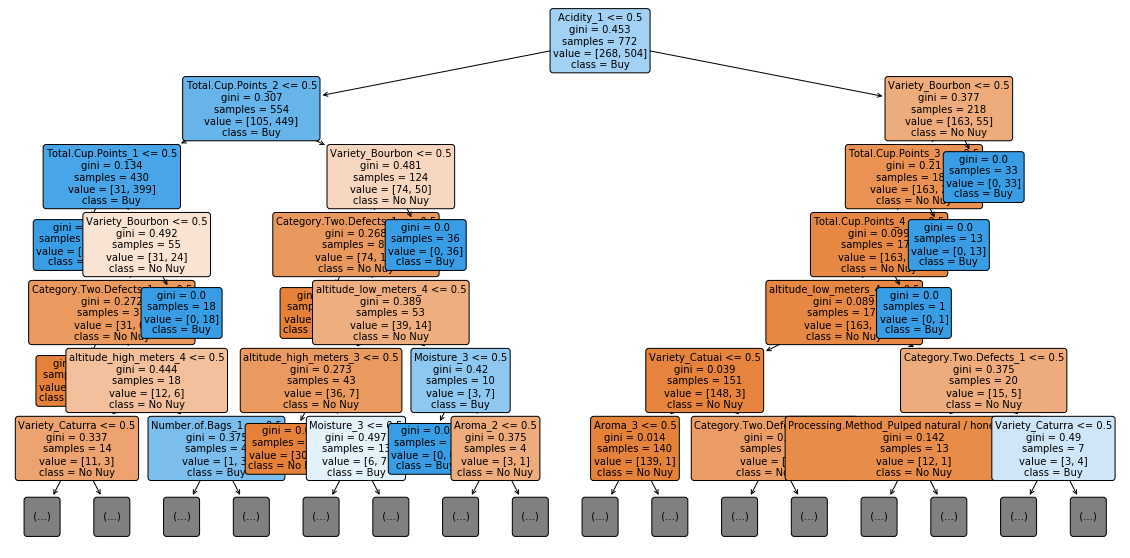

In [125]:
plt.figure(figsize= (20, 10))
plot_tree(model,filled = True, rounded= True, max_depth= 6, fontsize=10, feature_names= train_x.columns, class_names=['No Nuy','Buy'])
plt.show()

### 計算每個feature對於分類的weighted Gini Index

In [44]:
def get_weighted_gini(col):
    no_train_idx = train_x[train_x[col] != 1].index
    yes_train_idx = train_x[train_x[col] == 1].index 
    
    value_cnt_no = df.iloc[no_train_idx]['Buy'].value_counts()
    value_cnt_yes = df.iloc[yes_train_idx]['Buy'].value_counts()
    
    gini_list = []
    total_list = []
    
    for idx, value_cnt in enumerate([value_cnt_no, value_cnt_yes]):
        
        try:
            buy_cnt = value_cnt[1]
        except:
            buy_cnt = 0
        try:
            nobuy_cnt = value_cnt[0]
        except:
            nobuy_cnt = 0
            
        total_cnt = buy_cnt + nobuy_cnt
        
        if total_cnt == 0:
            continue
            
        gini_index = 1 - (buy_cnt/total_cnt)**2 - (nobuy_cnt/total_cnt)**2
        gini_list.append(gini_index)
        total_list.append(total_cnt)
        
#         print('gini index for col {} == {} is {}'.format(col, idx, gini_index))
        
    weighted_gini = 0
    for idx in range(len(gini_list)):
        weighted_gini += gini_list[idx]*total_list[idx]/sum(total_list)
        
#     print('weighted_gini:', weighted_gini)
    return  weighted_gini

## Parent gini

In [45]:
train_total = train_y.value_counts().sum()
parent_gini = 1 - (train_y.value_counts()[0]/train_total)**2 - (train_y.value_counts()[1]/train_total)**2
print('root parent gini index: {:.3f}'.format(parent_gini))

root parent gini index: 0.453


## 找出best split feature based on weighted gini

In [46]:
get_weighted_gini('Variety_Bourbon')

0.3852099220215861

In [47]:
get_weighted_gini('Acidity_1')

0.32700293054235374

In [48]:
gini_list = []

for idx, col in enumerate(train_x.columns):
#     print(idx)
    col_gini = get_weighted_gini(col)
    gini_list.append(col_gini)
# print(gini_list)
best_idx = np.argmin(np.array(gini_list))
print('best split column with lowest gini index: ',train_x.columns[best_idx])
print('lowest gini index: {:.3f}'.format(gini_list[best_idx]))

best split column with lowest gini index:  Acidity_1
lowest gini index: 0.327


----

# Ground Truth root node vs DT root node

In [49]:
bourbon_train_idx = train_x['Variety_Bourbon'] == 1
bourbon_train_idx = train_x[bourbon_train_idx].index 
print('the one with variety = Bourbon encoded 1:')
df.iloc[bourbon_train_idx]['Buy'].value_counts()

the one with variety = Bourbon encoded 1:


1    170
Name: Buy, dtype: int64

In [50]:
bourbon_train_idx = train_x['Variety_Bourbon'] != 1
bourbon_train_idx = train_x[bourbon_train_idx].index 
print('the one with variety = Bourbon encoded 0:')
value_cnt = df.iloc[bourbon_train_idx]['Buy'].value_counts()
buy_cnt = value_cnt[1]
nobuy_cnt = value_cnt[0]
total_cnt = buy_cnt + nobuy_cnt
value_cnt

the one with variety = Bourbon encoded 0:


1    334
0    268
Name: Buy, dtype: int64

In [51]:
print('the one with Acidity = 1 encoded 0:')
df.iloc[train_x.loc[train_x['Acidity_1']==0].index]['Buy'].value_counts()

the one with Acidity = 1 encoded 0:


1    449
0    105
Name: Buy, dtype: int64

In [52]:
print('the one with Acidity = 1 encoded 1:')
df.iloc[train_x.loc[train_x['Acidity_1']==1].index]['Buy'].value_counts()

the one with Acidity = 1 encoded 1:


0    163
1     55
Name: Buy, dtype: int64

---

## 討論二：Default的 DT分類錯誤情形

發現: idx= 18 分類錯誤(pred= 1, gt= 0) 因為training accuracy = 1, 代表DT完全overfit, 且DT規則中發現若濕度不等於3 則判斷為買，但rules裡面設定是moisture 大於等於3以上配合其他條件才能買？

找出原因:

細部了解DT對於training data劃出的Tree，並針對分類錯誤的data來看，找到問題的核心: DT對Unseen data的分辨能力較低。
再training data中，依照DT的分法，當此咖啡豆的杯測分數低於3分，且並非bourbon，且two_defects= 1, low_mean_altitude=4(這部分也因為變數相關太高也用跟rules不同的條件分，因為low, high, mean altitude的相關性太高了)，都符合Rules設定，但DT繼續判斷咖啡豆濕度不為三後就直接分類成"買"，這邊的重點就是，剛好這筆test data的Moiture是4，雖然的確不為3，但是因為training data裡面不為三的咖啡豆剛好濕度都是1或2，在我設定的rule之下會直接被歸類為"買"，而這筆test data的溼度是training data內沒有遇到過的，DT就會以為濕度應該就會是1或2，所以造成分類錯誤。

In [93]:
for idx, (pred, gt) in enumerate(zip(pred_y, test_y)):
    if pred != gt :
        print('第一筆分類錯誤的row idx為: {}'.format(idx))
        print('預測為: {}\nground truth為: {}'.format(pred, gt))
        false_idx = idx
        break

第一筆分類錯誤的row idx為: 18
預測為: 1
ground truth為: 0


In [94]:
test_df[test_df.index==false_idx]

,Number.of.Bags,Bag.Weight,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Buy
18,1,3,Gesha,Washed / Wet,2,2,2,3,1,2,1,1,1,2,4,1,1,1,4,4,4,0


In [122]:
# for idx in range(len(train_df)):
#     comparison = train_df.iloc[idx].values == test_df.iloc[0].values
# #     print(comparison)
#     if comparison.all():
#         print(idx)
#         break

----

# Bernoulli Naive Bayes Classifier
 P(sample|y) = P(y) * P(x1|y) * P(x2|y) * P(x3|y) * ... * P(xn|y) 

In [53]:
df_mask = df.drop(df[['Species','Harvest.Year','Certification.Body','Country.of.Origin']],axis=1)


In [54]:
B_cls = BernoulliNB()

In [55]:
B_model = B_cls.fit(train_x, train_y)

In [56]:
B_pred_y = B_model.predict(test_x)

In [57]:
precision_recall_fscore_support(B_pred_y, test_y)

(array([0.94936709, 0.88695652]),
 array([0.85227273, 0.96226415]),
 array([0.89820359, 0.92307692]),
 array([ 88, 106], dtype=int64))

In [58]:
for idx, (pred, gt) in enumerate(zip(B_pred_y, test_y)):
    if pred != gt:
        print('idx: {}'.format(idx))
        print('prob given 0 : {0[0]:.3f}\nprob given 1 : {0[1]:.3f}'.format(B_model.predict_proba(test_x)[idx])) # 0: placeholder
        print('pred y: {}'.format(B_pred_y[idx]))
        print('ground truth y: {}\n'.format(test_y.iloc[idx]))
#         print('test_x : \n{}'.format(test_x.iloc[idx]))
        false_idx = idx
        break

idx: 3
prob given 0 : 0.002
prob given 1 : 0.998
pred y: 1
ground truth y: 0



In [59]:
pd.DataFrame(df_mask.loc[test_x.iloc[false_idx].name]).T

,Number.of.Bags,Bag.Weight,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Buy
557,3,1,Caturra,Washed / Wet,1,4,1,4,4,4,1,1,1,2,3,1,1,1,3,3,3,0


---

# Trial

## 找出分類錯誤該項的各feature機率 given y 

In [60]:
train_df = df_mask.iloc[train_x.index].reset_index(drop= True)

In [61]:
test_df = df_mask.iloc[test_x.index].reset_index(drop= True)

In [62]:
pbuy = train_df['Buy'].value_counts()[1]/train_df['Buy'].value_counts().sum()
pnob = train_df['Buy'].value_counts()[0]/train_df['Buy'].value_counts().sum()

In [63]:
Nb_cond_prob = 1 

for col in train_df.iloc[:,:-1].columns:
    group_df = train_df.groupby('Buy')[col].value_counts()
    test_col_value = test_df.iloc[false_idx][col]
    
    if test_col_value not in group_df[0].index:
        cond_prob = 1e-6
        print('for {} column, test data value == {} == not found in train data'.format(col, test_col_value))
    else:
        cond_prob = group_df[0][test_col_value]/group_df[0].sum()
        print('for {} col, cond_prob = {:.2f}'.format(col, cond_prob))
    Nb_cond_prob *= cond_prob
#     print(cond_prob)

print('\ngiven no buy prod: {:}'.format(Nb_cond_prob*pnob))

for Number.of.Bags col, cond_prob = 0.30
for Bag.Weight col, cond_prob = 0.44
for Variety col, cond_prob = 0.21
for Processing.Method col, cond_prob = 0.72
for Aroma col, cond_prob = 0.59
for Flavor col, cond_prob = 0.03
for Aftertaste col, cond_prob = 0.47
for Acidity col, cond_prob = 0.02
for Body col, cond_prob = 0.05
for Balance col, cond_prob = 0.04
for Uniformity col, cond_prob = 1.00
for Clean.Cup col, cond_prob = 1.00
for Sweetness col, cond_prob = 1.00
for Total.Cup.Points col, cond_prob = 0.47
for Moisture col, cond_prob = 0.30
for Category.One.Defects col, cond_prob = 1.00
for Quakers col, cond_prob = 1.00
for Category.Two.Defects col, cond_prob = 0.46
for altitude_low_meters col, cond_prob = 0.21
for altitude_high_meters col, cond_prob = 0.28
for altitude_mean_meters col, cond_prob = 0.26

given no buy prod: 2.4105098987189464e-12


In [64]:
b_cond_prob = 1 

for col in train_df.iloc[:,:-1].columns:
    group_df = train_df.groupby('Buy')[col].value_counts()
    test_col_value = test_df.iloc[false_idx][col]
    
    if test_col_value not in group_df[1].index:
        cond_prob = 1e-6
        print('for {} column, test data value == {} == not found in train data'.format(col, test_col_value))
    else:
        cond_prob = group_df[1][test_col_value]/group_df[1].sum()
        print('for {} col, cond_prob = {:.2f}'.format(col, cond_prob))

    b_cond_prob *= cond_prob
#     print(cond_prob)

print('\ngiven buy prod: {}'.format(b_cond_prob*pbuy))

for Number.of.Bags col, cond_prob = 0.40
for Bag.Weight col, cond_prob = 0.22
for Variety col, cond_prob = 0.26
for Processing.Method col, cond_prob = 0.72
for Aroma col, cond_prob = 0.14
for Flavor col, cond_prob = 0.34
for Aftertaste col, cond_prob = 0.11
for Acidity col, cond_prob = 0.36
for Body col, cond_prob = 0.28
for Balance col, cond_prob = 0.34
for Uniformity col, cond_prob = 1.00
for Clean.Cup col, cond_prob = 1.00
for Sweetness col, cond_prob = 1.00
for Total.Cup.Points col, cond_prob = 0.12
for Moisture col, cond_prob = 0.21
for Category.One.Defects col, cond_prob = 1.00
for Quakers col, cond_prob = 1.00
for Category.Two.Defects col, cond_prob = 0.61
for altitude_low_meters col, cond_prob = 0.24
for altitude_high_meters col, cond_prob = 0.26
for altitude_mean_meters col, cond_prob = 0.26

given buy prod: 4.5830142837180764e-10


## 計算與classifier結果

In [65]:
if Nb_cond_prob > b_cond_prob:
    print('shoud predict No buy')
else:
    print('shoud predict buy')

shoud predict buy


### 在不買的情況下，對於訓練dataset， flavor, acidity, body , balance =4 的機率都非常低 所以貝式分類將idx =3 這筆預測為buy

In [66]:
train_df[train_df['Buy']==0]['Flavor'].value_counts()

1    158
2     77
3     25
4      8
Name: Flavor, dtype: int64

### 是否為資料不集中的問題? ---> 否
整份dataset來說 在不買的情況下 flavor = 4的機率也很低 

In [67]:
df[df['Buy']==0]['Flavor'].value_counts()

1    213
2     90
3     34
4     10
Name: Flavor, dtype: int64

## 結論: 因為這幾個變數之間的相關性太高，儘管有些變數對於分類沒有預測性(完全沒有在ground truth)，但因為相關性太高的關係，加上其特定類別在特定class的機率特別小，使得這些變數在貝式計算中相乘起來會使得整體的機率很小，而造成分類錯誤

----

# 隨機森林